# Analysis of True Price ABM

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import cProfile
import pstats
import mesa
pd.set_option('display.max_colwidth', 10000)
import joblib
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami

In [8]:
#from model import ConsumatModel
from model5 import ConsumatModel

In [9]:
#Import KDE models

kde_modeks = {
    'ccrdprs': joblib.load('saved_data/kde_ccrdprs.pkl'),
    'gvsrdcc': joblib.load('saved_data/kde_gvsrdcc.pkl'),
    'hincfel': joblib.load('saved_data/kde_hincfel.pkl'),
    'impenv': joblib.load('saved_data/kde_impenv.pkl'),
    'impfree': joblib.load('saved_data/kde_impfree.pkl'),
    'imprich': joblib.load('saved_data/kde_imprich.pkl'),
    'inctxff': joblib.load('saved_data/kde_inctxff.pkl'),
    'inprdsc': joblib.load('saved_data/kde_inprdsc.pkl'),
    'ipfrule': joblib.load('saved_data/kde_ipfrule.pkl'),
    'iplylfr': joblib.load('saved_data/kde_iplylfr.pkl'),
    'lkredcc': joblib.load('saved_data/kde_lkredcc.pkl'),
    'sclmeet': joblib.load('saved_data/kde_sclmeet.pkl'),
    'wrclmch': joblib.load('saved_data/kde_wrclmch.pkl'),
    'wrkctra': joblib.load('saved_data/kde_wrkctra.pkl')
}

In [10]:

config = {
    'mean_degree': 6,
    'rewiring_prob': 0.1,
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': 'saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,  
    'max_increase_percentage': 10,
    'num_products':20,
    'inflation_rate': 3,  # You can specify a range here or set a specific value
    'seed': 42,  # Seed for reproducibility,
    'network_type': 'sda_conformity',  
    'network_params': {
        'n': 1000,  # Number of nodes
        'k': 4,    # Each node is connected to k nearest neighbors in ring topology (for Watts-Strogatz)
        'p': 0.1,  # The probability of rewiring each edge (for Watts-Strogatz)
        'm': 2,
        'd': 4,
        'homophily_attribute': 'preference_conformity', 
        'alpha': 5,  # Level of homophily,
        'b': 0.1,  # Characteristic distance
}}

original_config = config.copy()

In [11]:
def run_simulation(model, num_steps):
    # List to store True Price Adoption Rates
    adoption_rates = []

    # Run the model for a specified number of steps with tqdm for progress tracking
    for i in tqdm(range(num_steps), desc='Simulation Progress'):
        model.step()
        # Append the current adoption rate to the list
        adoption_rates.append(model.calculate_true_price_adoption_rate())

    model_data = model.datacollector.get_model_vars_dataframe()
    model_data['Adoption Rates'] = adoption_rates
    return model_data


In [12]:
model = ConsumatModel(config)
num_steps = 10
model_data = run_simulation(model,num_steps)
print(model_data)


Simulation Progress: 100%|██████████| 10/10 [01:41<00:00, 10.17s/it]

   Average Degree  Average Clustering Average Path Length  Adoption Rates
0          357.85              0.6949                None             0.0
1          357.85              0.6949                None             0.0
2          357.85              0.6949                None             0.0
3          357.85              0.6949                None            97.7
4          357.85              0.6949                None            97.0
5          357.85              0.6949                None            97.1
6          357.85              0.6949                None            96.9
7          357.85              0.6949                None            97.5
8          357.85              0.6949                None            96.8
9          357.85              0.6949                None            97.2


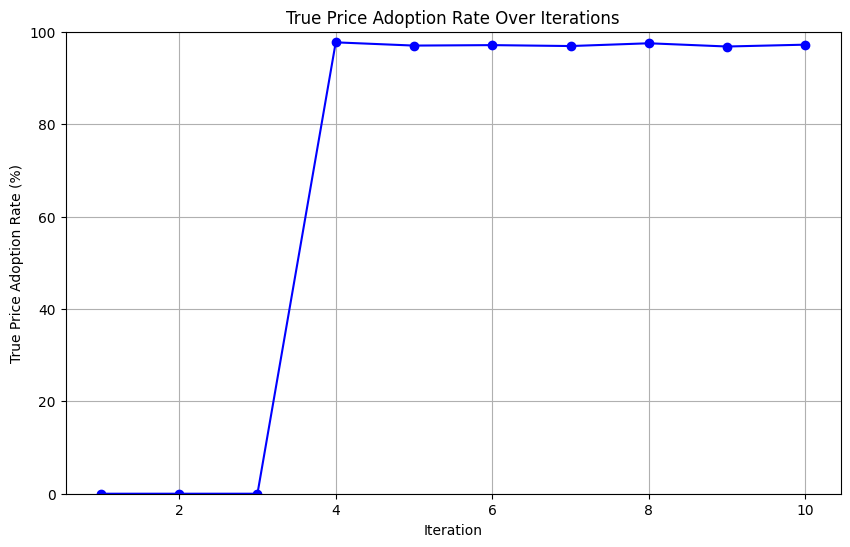

In [20]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_steps + 1), model_data['Adoption Rates'], marker='o', color='b')  # Plotting the adoption rates against iterations
plt.title('True Price Adoption Rate Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

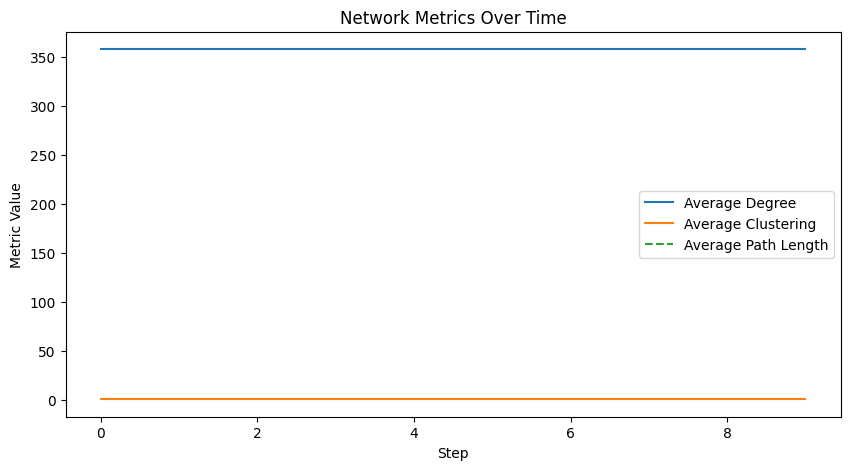

In [14]:
# Optionally plot other network metrics if needed
plt.figure(figsize=(10, 5))
plt.plot(model_data['Average Degree'], label='Average Degree')
plt.plot(model_data['Average Clustering'], label='Average Clustering')
if 'Average Path Length' in model_data.columns:
    plt.plot(model_data['Average Path Length'], label='Average Path Length', linestyle='--')
plt.xlabel('Step')
plt.ylabel('Metric Value')
plt.title('Network Metrics Over Time')
plt.legend()
plt.show()

### Check performance:

In [19]:

cProfile.run('run_simulation(model, num_steps)', 'model_performance_profile')
p = pstats.Stats('model_performance_profile')
p.sort_stats('cumulative').print_stats(5)


Simulation Progress: 100%|██████████| 10/10 [01:52<00:00, 11.25s/it]


ValueError: All arrays must be of the same length

### Product distribution before and after

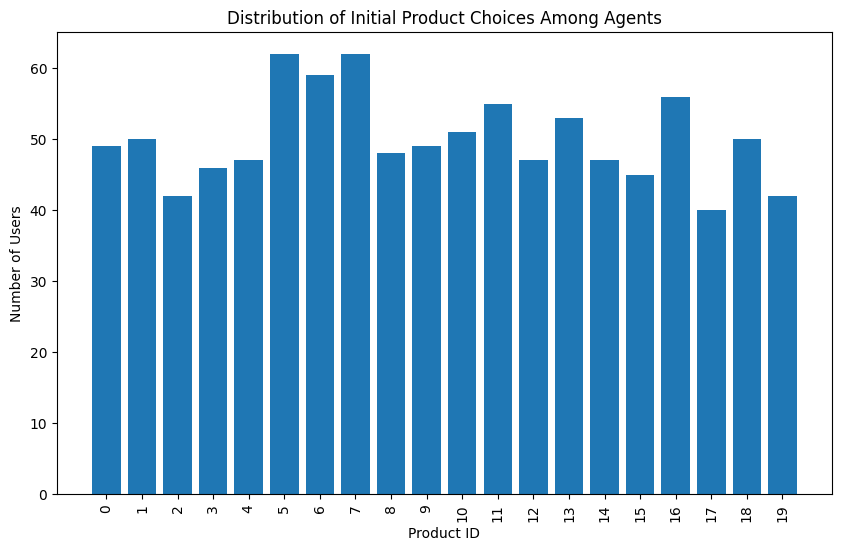

Iteration 1: True Price Adoption Rate = 0.0%
Iteration 2: True Price Adoption Rate = 0.0%
Iteration 3: True Price Adoption Rate = 0.0%
Introducing 14 True Price products.
Iteration 4: True Price Adoption Rate = 97.39999999999999%
Iteration 5: True Price Adoption Rate = 96.7%
Iteration 6: True Price Adoption Rate = 97.6%
Iteration 7: True Price Adoption Rate = 97.0%
Iteration 8: True Price Adoption Rate = 97.39999999999999%
Iteration 9: True Price Adoption Rate = 96.8%
Iteration 10: True Price Adoption Rate = 97.0%
Iteration 11: True Price Adoption Rate = 97.3%
Iteration 12: True Price Adoption Rate = 97.3%
Iteration 13: True Price Adoption Rate = 96.5%
Iteration 14: True Price Adoption Rate = 97.39999999999999%
Iteration 15: True Price Adoption Rate = 97.2%
Iteration 16: True Price Adoption Rate = 97.3%
Iteration 17: True Price Adoption Rate = 97.0%
Iteration 18: True Price Adoption Rate = 97.5%
Iteration 19: True Price Adoption Rate = 96.8%
Iteration 20: True Price Adoption Rate = 97.

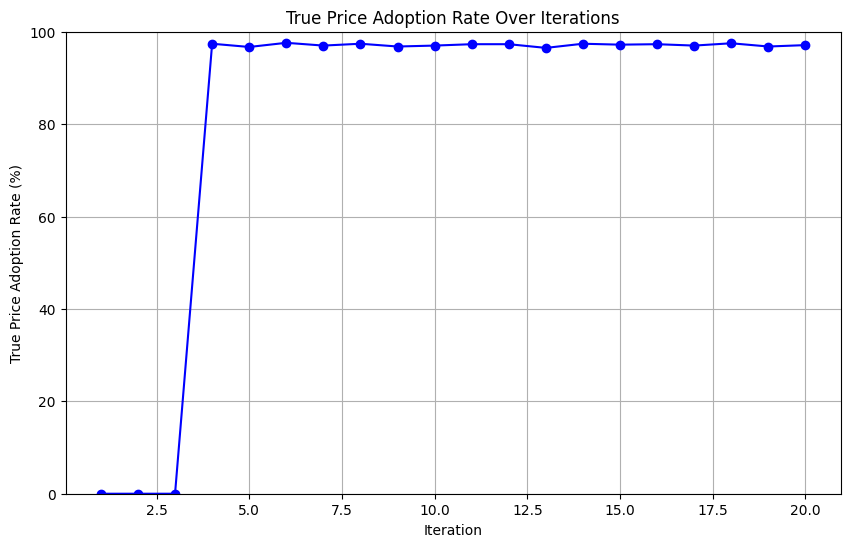

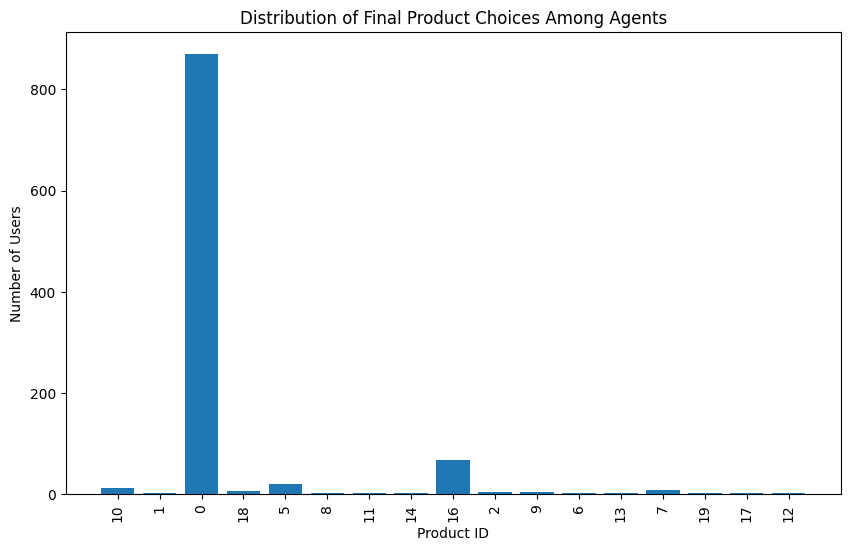

In [ ]:
# Set the number of steps you wish to simulate
num_steps = 20

# Initialize your model
model = ConsumatModel(config)

# Visualization code for initial product distribution
initial_product_usage_counts = Counter([agent.last_purchased_product.product_id for agent in model.agents if agent.last_purchased_product])

# Sorting products by their IDs for consistent plotting
sorted_initial_product_ids = sorted(initial_product_usage_counts.keys())
sorted_initial_counts = [initial_product_usage_counts[pid] for pid in sorted_initial_product_ids]

# Visualization of Initial Product Distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_initial_product_ids)), sorted_initial_counts, tick_label=sorted_initial_product_ids)
plt.xlabel('Product ID')
plt.ylabel('Number of Users')
plt.title('Distribution of Initial Product Choices Among Agents')
plt.xticks(rotation=90)  # Rotate labels to make them readable
plt.show()

# Run the model for a specified number of steps and get adoption rates
adoption_rates = run_simulation(model, num_steps)

# Plotting the True Price Adoption Rates after running the model
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_steps+1), adoption_rates, marker='o', color='b')
plt.title('True Price Adoption Rate Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# Visualization code for final product distribution
final_product_usage_counts = Counter([agent.last_purchased_product.product_id for agent in model.agents if agent.last_purchased_product])

# Visualization of Final Product Distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(final_product_usage_counts)), final_product_usage_counts.values(), tick_label=list(final_product_usage_counts.keys()))
plt.xlabel('Product ID')
plt.ylabel('Number of Users')
plt.title('Distribution of Final Product Choices Among Agents')
plt.xticks(rotation=90)
plt.show()


How many agents choose each strategy per step:

In [ ]:
model_data = model.datacollector.get_agent_vars_dataframe()
decision_modes_count = model_data.groupby('Step').sum()[['Repeat', 'Imitate', 'Deliberate', 'Social_Compare']]
print(decision_modes_count)

      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1         13       41          80             866
2         68       47          75             810
3         81       20          73             826
4         84       38          73             805
5         87       20          70             823
6         90       37          68             805
7         90       22          68             820
8         90       31          69             810
9         90       23          71             816
10        90       31          69             810
11        90       28          71             811
12        90       27          71             812
13        90       23          68             819
14        90       31          70             809
15        90       20          71             819
16        90       31          68             811
17        90       22          74             814
18        91       32          72             805


### Distribution of agent attributes:

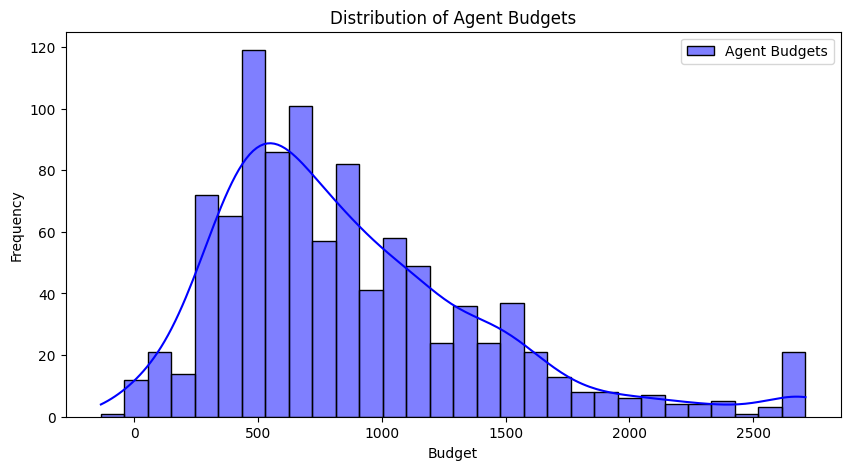

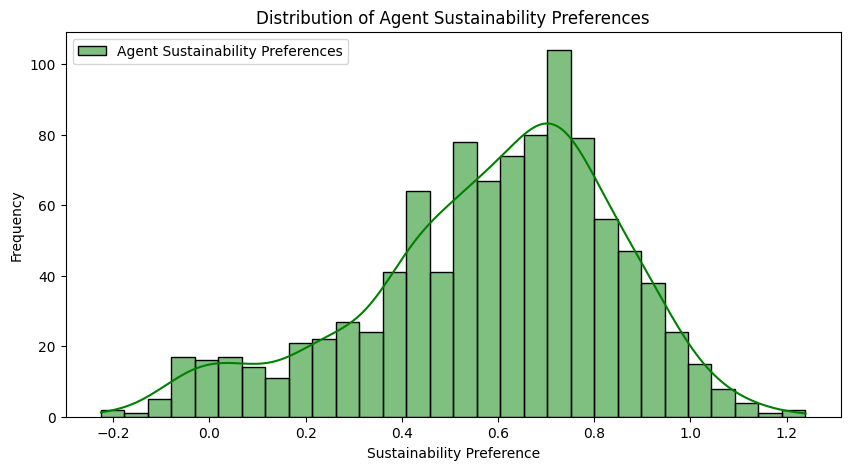

In [ ]:
# Collect agent attributes
agent_budgets = [agent.budget for agent in model.agents]
agent_sustainability_preferences = [agent.preference_sustainability for agent in model.agents]

# Visualization code here
# Plot for Budget Distribution
plt.figure(figsize=(10, 5))
sns.histplot(agent_budgets, bins=30, kde=True, color='blue', label='Agent Budgets')
plt.title('Distribution of Agent Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot for Sustainability Preferences Distribution
plt.figure(figsize=(10, 5))
sns.histplot(agent_sustainability_preferences, bins=30, kde=True, color='green', label='Agent Sustainability Preferences')
plt.title('Distribution of Agent Sustainability Preferences')
plt.xlabel('Sustainability Preference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Multiple runs of the same model:

Iteration 1: True Price Adoption Rate = 0.0%
Iteration 2: True Price Adoption Rate = 0.0%
Iteration 3: True Price Adoption Rate = 0.0%
Introducing 10 True Price products.
Iteration 4: True Price Adoption Rate = 8.1%
Iteration 5: True Price Adoption Rate = 8.5%
Iteration 6: True Price Adoption Rate = 8.1%
Iteration 7: True Price Adoption Rate = 8.5%
Iteration 8: True Price Adoption Rate = 7.9%
Iteration 9: True Price Adoption Rate = 8.4%
Iteration 10: True Price Adoption Rate = 7.7%
Iteration 1: True Price Adoption Rate = 0.0%
Iteration 2: True Price Adoption Rate = 0.0%
Iteration 3: True Price Adoption Rate = 0.0%
Introducing 10 True Price products.
Iteration 4: True Price Adoption Rate = 95.89999999999999%
Iteration 5: True Price Adoption Rate = 94.8%
Iteration 6: True Price Adoption Rate = 95.7%
Iteration 7: True Price Adoption Rate = 94.8%
Iteration 8: True Price Adoption Rate = 95.1%
Iteration 9: True Price Adoption Rate = 94.6%
Iteration 10: True Price Adoption Rate = 95.5%
Iterat

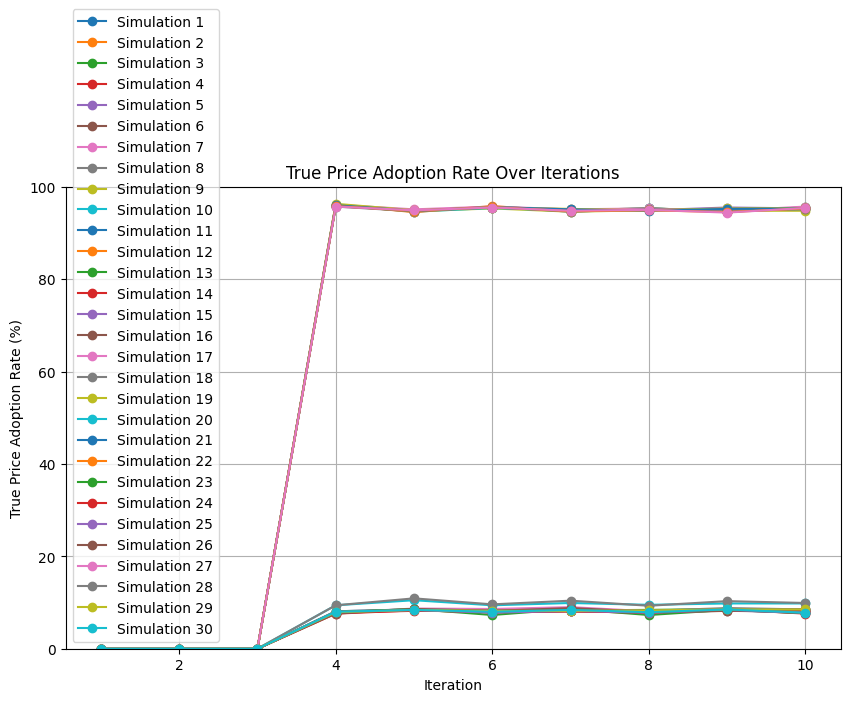

In [ ]:
config = {
    'mean_degree': 6,
    'rewiring_prob': 0.1,
    'TP_percentage': 0.5,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': 'saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,  
    'max_increase_percentage': 10,
    'num_products':20,
    'inflation_rate': 3,  # You can specify a range here or set a specific value
    'seed': 42,  # Seed for reproducibility,
    'network_type': 'sda_sustainability',  
    'network_params': {
        'n': 1000,  # Number of nodes
        'k': 4,    # Each node is connected to k nearest neighbors in ring topology (for Watts-Strogatz)
        'p': 0.1,  # The probability of rewiring each edge (for Watts-Strogatz)
        'm': 2,
        'd': 4,
        'homophily_attribute': 'preference_sustainability', 
        'alpha': 10,  # Level of homophily,
        'b': 0.5,  # Characteristic distance
}}

# Number of simulations
num_simulations = 30

# Number of steps per simulation
num_steps = 10

# Initialize a figure
plt.figure(figsize=(10, 6))

# Loop over the number of simulations
for simulation in range(num_simulations):
    # Initialize your model
    model = ConsumatModel(config)
    
    # Run the model for a specified number of steps and collect adoption rates
    adoption_rates = run_simulation(model, num_steps)
    
    # Plotting the results for the current simulation
    plt.plot(range(1, num_steps + 1), adoption_rates, marker='o', label=f'Simulation {simulation+1}')

# Finalizing the plot
plt.title('True Price Adoption Rate Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

### Vary True Price percentage

In [ ]:

# Define a range of values for TP_percentage
tp_percentages = np.linspace(0.1, 0.9, 9)  # From 10% to 90%, with increments of 10%

# Hold the number of steps constant for each simulation
num_steps = 30

# Dictionary to store adoption rates for each TP_percentage
adoption_rates_by_tp_percentage = {}

for tp_percentage in tp_percentages:
    # Update the config with the current TP_percentage
    config['TP_percentage'] = tp_percentage
    
    # Run the simulation
    model = ConsumatModel(config)
    adoption_rates = run_simulation(model, num_steps)
    
    # Store the final adoption rate for this TP_percentage
    adoption_rates_by_tp_percentage[tp_percentage] = adoption_rates[-1]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(list(adoption_rates_by_tp_percentage.keys()), list(adoption_rates_by_tp_percentage.values()), marker='o')
plt.title('Local Sensitivity Analysis - TP_percentage Impact on Adoption Rate')
plt.xlabel('TP_percentage')
plt.ylabel('Final True Price Adoption Rate (%)')
plt.grid(True)
plt.show()


NameError: name 'run_simulation' is not defined

### Sensitivity analysis for alpha and b of sda networks:

Total Progress: 100%|██████████| 400/400 [05:01<00:00,  1.33it/s]


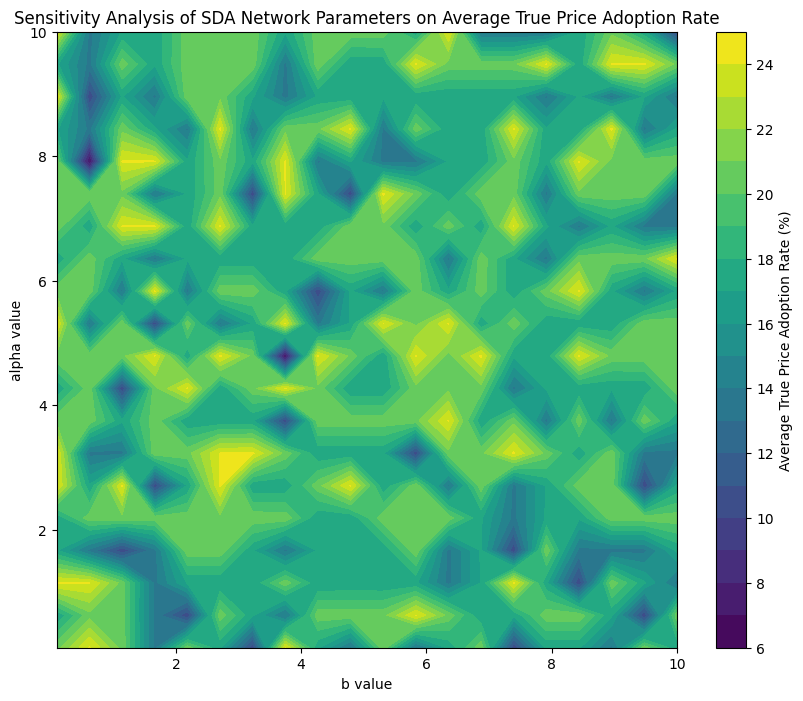

In [15]:
def run_model(alpha, b, num_steps=10, repetitions=5):
    # Placeholder for averages of True Price Adoption Rates from each repetition
    average_adoption_rates = []

    for _ in range(repetitions):
        config = {
            'mean_degree': 6,
            'rewiring_prob': 0.1,
            'TP_percentage': 0.5,
            'satisfaction_threshold': 0.5,
            'uncertainty_threshold': 0.5,
            'kde_models_dir': 'saved_data/',
            'product_price_range': (50, 500),
            'min_increase_percentage': 4,
            'max_increase_percentage': 10,
            'num_products': 20,
            'inflation_rate': 3,  # You can specify a range here or set a specific value
            'seed': 42,  # Seed for reproducibility
            'network_type': 'sda_sustainability',
            'network_params': {'n': 100, 'alpha': alpha, 'b': b, 'homophily_attribute': 'preference_sustainability', }
        }
        # Initialize the model with the current configuration
        model = ConsumatModel(config)

        # Use the run_simulation function to run the model and collect True Price Adoption Rates
        adoption_rates = run_simulation(model, num_steps)

        # Compute the average adoption rate for the current repetition
        average_adoption_rate = np.mean(adoption_rates)
        average_adoption_rates.append(average_adoption_rate)

    # Return the overall average adoption rate across all repetitions
    return np.mean(average_adoption_rates)

# Continue with your sensitivity analysis as before



# Define the ranges for alpha and b values
alpha_values = np.linspace(0.1, 10, 20) 
b_values = np.linspace(0.1, 10, 20)  

# Prepare to collect results
results = np.zeros((len(alpha_values), len(b_values)))

# Loop over all combinations of alpha and b values
with tqdm(total=len(alpha_values) * len(b_values), desc='Total Progress') as pbar:
    for i, alpha in enumerate(alpha_values):
        for j, b in enumerate(b_values):
            adoption_rate = run_model(alpha, b)
            results[i, j] = adoption_rate
            pbar.update(1)  # Update the progress after each iteration of the inner loop

# Plotting the results
plt.figure(figsize=(10, 8))
plt.contourf(b_values, alpha_values, results, cmap='viridis', levels=20)
plt.colorbar(label='Average True Price Adoption Rate (%)')
plt.xlabel('b value')
plt.ylabel('alpha value')
plt.title('Sensitivity Analysis of SDA Network Parameters on Average True Price Adoption Rate')
plt.show()



First order, second-order and total sensitivity indices (global sensitivity analysis)

In [19]:


# Define the model inputs (the ranges for your alpha and b parameters)
problem = {
    'num_vars': 2,
    'names': ['alpha', 'b'],
    'bounds': [[0.1, 10], [0.1, 10]]  # Example bounds
}

# Generate samples using the Saltelli sampler
# The second argument (1000) is the number of sample points
param_values = saltelli.sample(problem, 100)

# Run the model for each set of generated parameters
# This will be specific to your model. You need to replace the following loop
# with the logic to run your own model and collect the adoption rates.
Y = np.zeros(param_values.shape[0])
for i, X in enumerate(tqdm(param_values, desc='Running simulations')):
    Y[i] = run_model(X[0], X[1]) 

# Perform Sobol analysis using the output from your model
# This calculates the first-order, second-order, and total-order indices
Si = sobol.analyze(problem, Y, print_to_console=False)

# First-order indices
print("First-order indices:", Si['S1'])

# Total-order indices
print("Total-order indices:", Si['ST'])

# Second-order indices
print("Second-order indices:", Si['S2'])

# Plotting the results (optional)
# You can plot the indices using matplotlib or another library


/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_1797/4139361629.py:10: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 100)
/Users/isabelklennert/opt/anaconda3/envs/thesisenv/lib/python3.9/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (100) is equal to `2^n`.
        
  warnings.warn(msg)
Running simulations: 100%|██████████| 600/600 [07:32<00:00,  1.33it/s]

First-order indices: [-0.0695591  -0.11647503]
Total-order indices: [1.02102617 0.84095617]
Second-order indices: [[       nan 0.16544692]
 [       nan        nan]]


### Sensitivity Analysis for different parameters

Performing Sensitivity Analysis: 100%|██████████| 38/38 [01:56<00:00,  3.07s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


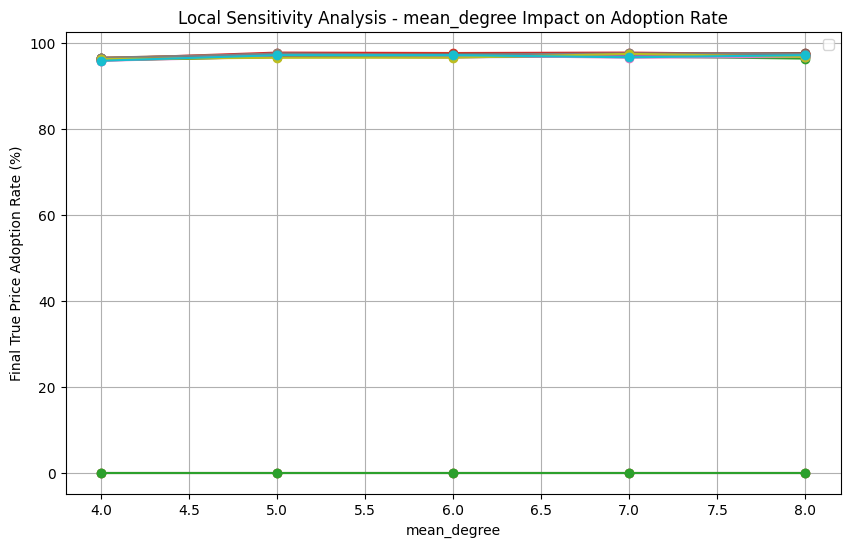

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


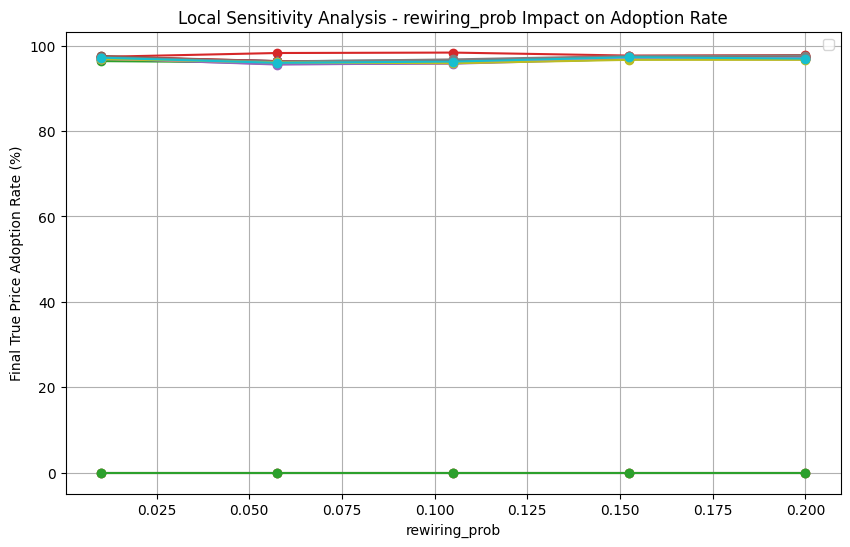

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


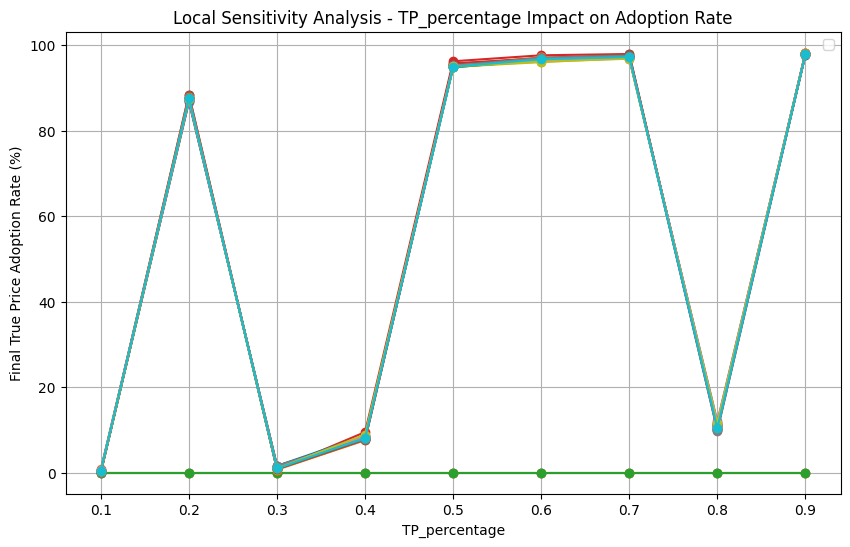

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


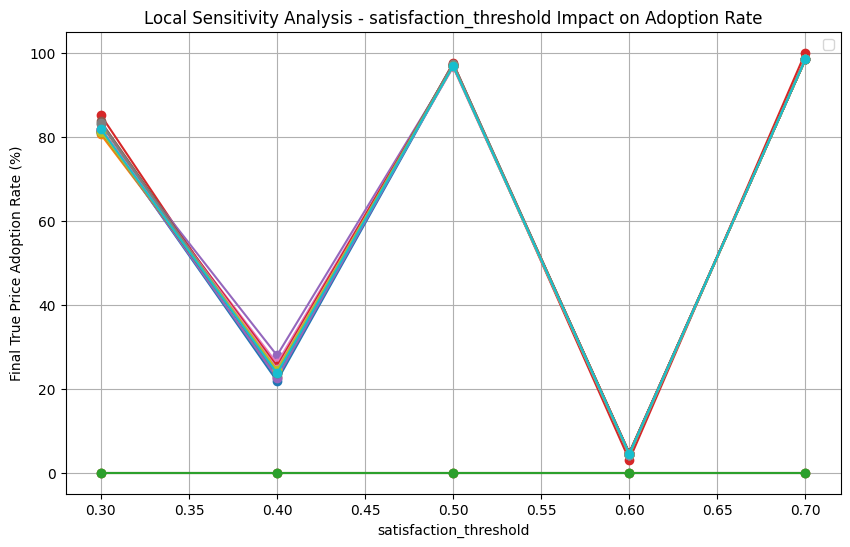

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


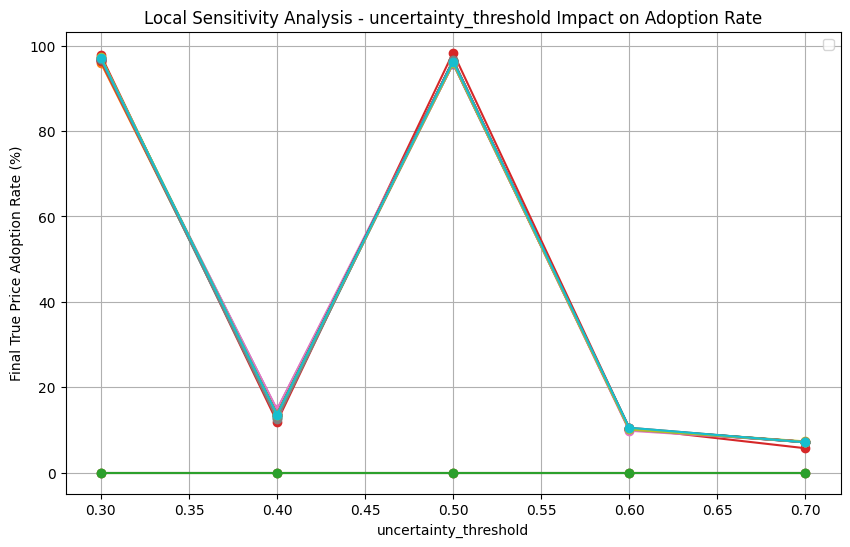

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


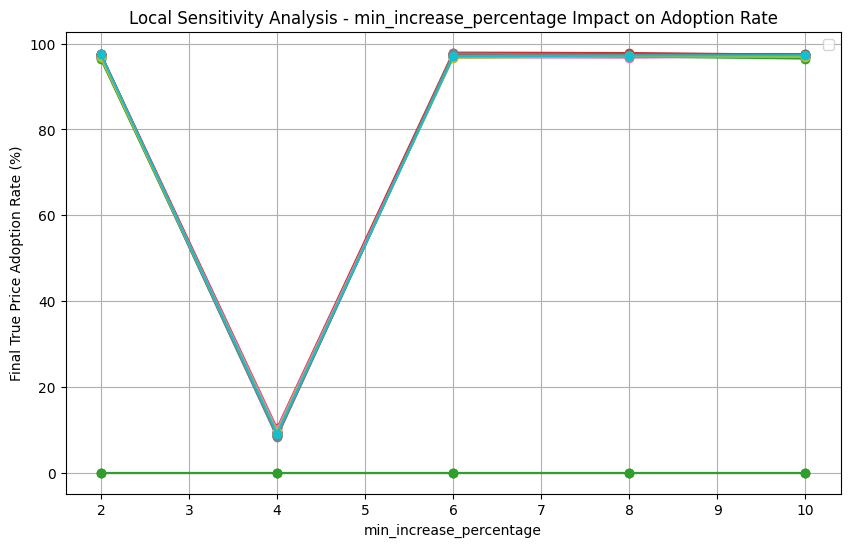

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


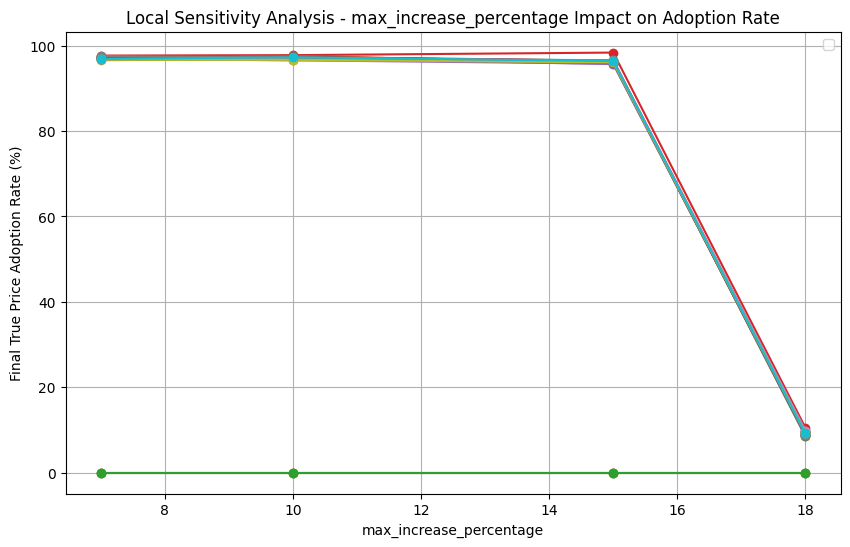

In [18]:

def run_local_sensitivity_analysis(parameter_ranges, config, num_steps, run_simulation):
    results = {}
    results = {}
    total_runs = sum(len(values) for values in parameter_ranges.values())
    progress_bar = tqdm(total=total_runs, desc='Performing Sensitivity Analysis')

    # Save original config
    original_config = config.copy()
    
    # Iterate over all parameters
    for parameter, values in parameter_ranges.items():
        results[parameter] = []
        for value in values:
            # Update parameter value
            if parameter in config:
                config[parameter] = value
            elif parameter in config['network_params']:
                config['network_params'][parameter] = value
            else:
                raise ValueError(f"Parameter {parameter} not found in config.")
            
            # Run the simulation
            model = ConsumatModel(config)
            final_adoption_rate = run_simulation(model, num_steps)
            results[parameter].append(final_adoption_rate)
            
            # Reset config
            config = original_config.copy()
            progress_bar.update(1)
    progress_bar.close()
    return results

parameter_ranges = {
    'mean_degree': [4, 5, 6, 7, 8],
    'rewiring_prob': np.linspace(0.01, 0.2, 5),
    'TP_percentage': np.linspace(0.1, 0.9, 9),
    'satisfaction_threshold': np.linspace(0.3, 0.7, 5),
    'uncertainty_threshold': np.linspace(0.3, 0.7, 5),
    'min_increase_percentage': [2, 4, 6, 8, 10],
    'max_increase_percentage': [7, 10, 15, 18]
}

# The number of steps per simulation is assumed to be constant
num_steps = 20

# Run the local sensitivity analysis
sensitivity_results = run_local_sensitivity_analysis(parameter_ranges, config, num_steps, run_simulation)

# Plotting the results
for parameter, adoption_rates in sensitivity_results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(parameter_ranges[parameter], adoption_rates, marker='o')
    plt.title(f'Local Sensitivity Analysis - {parameter} Impact on Adoption Rate')
    plt.xlabel(parameter)
    plt.ylabel('Final True Price Adoption Rate (%)')
    plt.grid(True)
    plt.legend()
    plt.show()


## Experiment 1: Network Convergence and Stability

Influence of initial structure of a network on its long term dynamics. Hypothesis: networks, despite their initial structural differences, would exhibit convergence toward stable patterns over time 

Plot metrics like average degree at each time step (time-evolving network measures)

Augmented Dickey-Fuller test to assess stability

Root mean square deviation across a sliding window to assess convergence



## Experiment 2: Homophily

Hypothesise that higher levels of homopily will lead to tighter-knit communities, reduced network integration and increased inequality in decision making??


Vary homophily parameters and collect metrics like average degree, average clustering, average path length and adoption rates
### Vary $\alpha$

### Vary $\beta$

## Experiment 3: Rewiring Probability
Hypothesise that higher rewiring probability will lead to increased integration and decreased clustering??

Run simulations with different rewiring probabilities, observing the speed at which the network converges.

Record network metrics and True Price adoption rates at each step.

## Global Sensitivity Analysis

Sobol indices

Saltelli sampling

Pick key parameters (e.g. alpha, beta, rewiring probability) and key measures (true price adoption rate...)